# Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Functions

Make repetate codes put into functions.

In [3]:
#get needed data features from imported data
def get_df(df):
  r_df=pd.DataFrame()
  r_df['member_caual'] = df['member_casual']
  r_df['rideable_type']=df['rideable_type']
  r_df['station_id']=df['start_station_id']
  r_df['station_name']=df['start_station_name']
  r_df['station_lat']=df['start_lat']
  r_df['station_lng']=df['start_lng']
  r_df['year'] = pd.to_datetime(df['started_at']).dt.year
  r_df['day_of_week'] = pd.to_datetime(df['started_at']).dt.day_name()
  r_df['month_name'] = pd.to_datetime(df['started_at']).dt.month_name()
  r_df['date'] = pd.to_datetime(df['started_at']).dt.date
  r_df['hour'] = pd.to_datetime(df['started_at']).dt.hour
  r_df['hour'] = r_df['hour'].astype(str)
  r_df['ride_mints']=(pd.to_datetime(df['ended_at']) - pd.to_datetime(df['started_at'])).dt.total_seconds() / 60

  return r_df

In [4]:
# process data frame by group by and get desired calculated features.
def get_station_stats(df):
  station_stats=pd.DataFrame()

  station_stats = df.groupby(['station_name', 'month_name']).agg(
      ride_count=('station_name', 'count'),
      mean_ride_minutes=('ride_mints', 'mean'),
      member_count=('member_caual', lambda x: (x == 'member').sum()),
      casual_count=('member_caual', lambda x: (x == 'casual').sum())
  ).reset_index()

  return station_stats


In [5]:
#concatinate two data frame (for concat one imported data to another)
def concat_df(df,df_temp_fn):
  df=pd.concat([df,df_temp_fn])
  return df

In [6]:
# convert months to quarter
def convert_month_to_quarter(month):
    if month in ['January', 'February', 'March']:
        return 'Q1'
    elif month in ['April', 'May', 'June']:
        return 'Q2'
    elif month in ['July', 'August', 'September']:
        return 'Q3'
    elif month in ['October', 'November', 'December']:
        return 'Q4'
    else:
        return None  # Handle cases where month is not valid

In [7]:
#for geting numbers of total dataset.
total_row=0
total_row_deleted=0
count=0

In [8]:
df=pd.DataFrame()

# Import and Process Data


In [9]:
FOLDER_PATH = '/content/drive/MyDrive/Data Analytics/ACCA- LGA- Data Analytics Course work/City Bike Marketing Plan/Data'

fileNames=os.listdir(FOLDER_PATH)

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
len(fileNames)


39

we have total 39 csv files. If we import all files without processing- then runtime will be crashed due to insufficient memory. So we will read one file then process and read again then concat.

In [12]:
for i in range(len(fileNames)):
  df_read=pd.read_csv('/content/drive/MyDrive/Data Analytics/City Bike Marketing Plan/Data/'+fileNames[i])
  df_get=get_df(df_read)
  temp_df=get_station_stats(df_get)
  df=concat_df(df,temp_df)
  total_row=total_row+len(df_read)
  count=count+1

df.info()

<ipython-input-12-9c9f58162696>:2: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_read=pd.read_csv('/content/drive/MyDrive/Data Analytics/ACCA- LGA- Data Analytics Course work/City Bike Marketing Plan/Data/'+fileNames[i])
<ipython-input-12-9c9f58162696>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_read=pd.read_csv('/content/drive/MyDrive/Data Analytics/ACCA- LGA- Data Analytics Course work/City Bike Marketing Plan/Data/'+fileNames[i])
<ipython-input-12-9c9f58162696>:2: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_read=pd.read_csv('/content/drive/MyDrive/Data Analytics/ACCA- LGA- Data Analytics Course work/City Bike Marketing Plan/Data/'+fileNames[i])
<ipython-input-12-9c9f58162696>:2: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_read=pd.read_c

<class 'pandas.core.frame.DataFrame'>
Index: 87372 entries, 0 to 2194
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   station_name       87372 non-null  object 
 1   month_name         87372 non-null  object 
 2   ride_count         87372 non-null  int64  
 3   mean_ride_minutes  87372 non-null  float64
 4   member_count       87372 non-null  int64  
 5   casual_count       87372 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 4.7+ MB


In [13]:
total_row

37726727

In [14]:
len(df)

87372

we can see we have read aprox 37 million records. But we after processing we get 87,372 records for analysis.

In [15]:
count

39

In [16]:
df

,station_name,month_name,ride_count,mean_ride_minutes,member_count,casual_count
0,1 Ave & E 110 St,April,1842,13.383595,1581,261
1,1 Ave & E 16 St,April,5477,10.242765,4826,651
2,1 Ave & E 18 St,April,6004,10.591643,5213,791
3,1 Ave & E 30 St,April,4114,10.525962,3776,338
4,1 Ave & E 38 St,April,3901,12.733019,3405,496
...,...,...,...,...,...,...
2190,Wyckoff Ave & Stanhope St,December,614,13.086343,524,90
2191,Wyckoff St & 3 Ave,December,406,10.301476,350,56
2192,Wythe Ave & Metropolitan Ave,December,1203,11.120218,1047,156
2193,Wythe Ave & N 13 St,December,550,9.928761,483,67


In [17]:
df

,station_name,month_name,ride_count,mean_ride_minutes,member_count,casual_count
0,1 Ave & E 110 St,April,1842,13.383595,1581,261
1,1 Ave & E 16 St,April,5477,10.242765,4826,651
2,1 Ave & E 18 St,April,6004,10.591643,5213,791
3,1 Ave & E 30 St,April,4114,10.525962,3776,338
4,1 Ave & E 38 St,April,3901,12.733019,3405,496
...,...,...,...,...,...,...
2190,Wyckoff Ave & Stanhope St,December,614,13.086343,524,90
2191,Wyckoff St & 3 Ave,December,406,10.301476,350,56
2192,Wythe Ave & Metropolitan Ave,December,1203,11.120218,1047,156
2193,Wythe Ave & N 13 St,December,550,9.928761,483,67


In [18]:
# save df to a csv
df.to_csv('output.csv', index=False)

In [19]:
df['quarter'] = df['month_name'].apply(convert_month_to_quarter)

In [20]:
df

,station_name,month_name,ride_count,mean_ride_minutes,member_count,casual_count,quarter
0,1 Ave & E 110 St,April,1842,13.383595,1581,261,Q2
1,1 Ave & E 16 St,April,5477,10.242765,4826,651,Q2
2,1 Ave & E 18 St,April,6004,10.591643,5213,791,Q2
3,1 Ave & E 30 St,April,4114,10.525962,3776,338,Q2
4,1 Ave & E 38 St,April,3901,12.733019,3405,496,Q2
...,...,...,...,...,...,...,...
2190,Wyckoff Ave & Stanhope St,December,614,13.086343,524,90,Q4
2191,Wyckoff St & 3 Ave,December,406,10.301476,350,56,Q4
2192,Wythe Ave & Metropolitan Ave,December,1203,11.120218,1047,156,Q4
2193,Wythe Ave & N 13 St,December,550,9.928761,483,67,Q4


In [21]:
median_ride_count=df['ride_count'].median()

In [22]:
median_ride_count

177.0

# Analysis

Main goal of analysis is to get marketing target to run marketing campaign. For this we will try to get ans of questions below:
<br>




*   How is business doing at the point of event?
*   Does Member riders do more ride than casual riders? if so then find those stations where rides are high but members are low.



<b>1.  How is business doing at the point of event of rides? </b>

In [81]:
below_median_count = df[df['ride_count'] < median_ride_count]['station_name'].count()
above_median_count = df[df['ride_count'] > median_ride_count]['station_name'].count()

<ipython-input-82-1fd7f61df35d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=['Doing Well', 'Not Doing Well'], y=[above_median_count, below_median_count], palette=['#0040ff', 'red'])


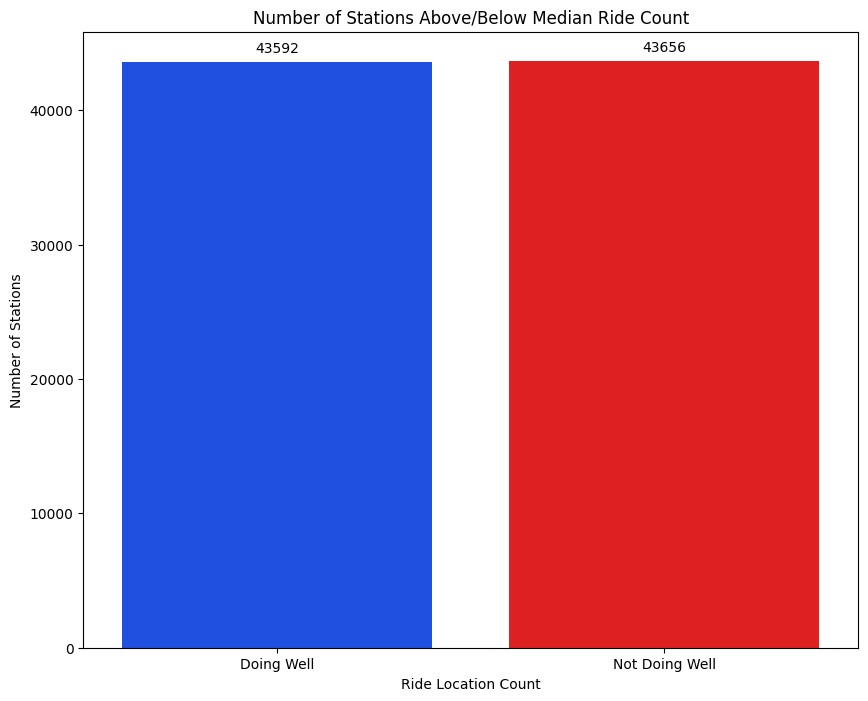

In [82]:
# Create the bar plot
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=['Doing Well', 'Not Doing Well'], y=[above_median_count, below_median_count], palette=['#0040ff', 'red'])
plt.xlabel('Ride Location Count')
plt.ylabel('Number of Stations')
plt.title('Number of Stations Above/Below Median Ride Count')

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()

So we see not doing well stations are almost same as doing well stations. But not doing well is higher in numbers.

<b> 2. Does Member riders do more ride than casual riders? </b>

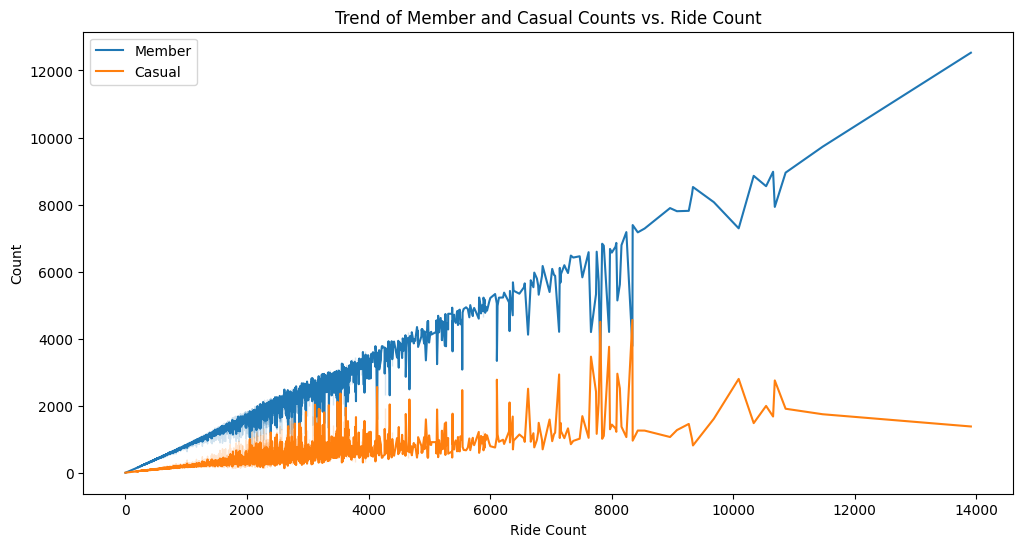

In [23]:
# Trend of member_count and casual_count vs. ride_count
plt.figure(figsize=(12, 6))
sns.lineplot(x='ride_count', y='member_count', data=df, label='Member')
sns.lineplot(x='ride_count', y='casual_count', data=df, label='Casual')
plt.xlabel('Ride Count')
plt.ylabel('Count')
plt.title('Trend of Member and Casual Counts vs. Ride Count')
plt.legend()
plt.show()


So, we can see ride count is getting high when members count is getting high. So we should focus to make more members. And we should focus to run campaigns to register more members.

Now, we need to identify which stations has high in rides and below in member_count


In [60]:
loc_stations_hRide_lMem=pd.DataFrame()

In [61]:
# Calculate the median member count
median_member_count = df['member_count'].median()

# Identify stations with high ride counts but below-median member counts
high_rides_low_members = df[(df['ride_count'] > median_ride_count) & (df['member_count'] < median_member_count)]

# Display the results
high_rides_low_members


,station_name,month_name,ride_count,mean_ride_minutes,member_count,casual_count,quarter
47,111 St & 53 Ave,April,234,29.852299,84,150,Q2
108,25 Ave & 85 St,April,195,16.066795,121,74,Q2
141,3 Ave & Wakeman Pl,April,209,25.711165,134,75,Q2
354,56 Ave & 92 St,April,204,12.225138,125,79,Q2
579,Arthur Ave & E 183 St,April,193,32.455919,133,60,Q2
...,...,...,...,...,...,...,...
733,Central Park W & W 72 St,December,183,16.523175,122,61,Q4
1449,Main St & Plymouth St,December,200,17.647973,127,73,Q4
1538,N 9 St & Wythe Ave,December,184,11.317939,128,56,Q4
693,Bus Slip & State St,December,229,21.487873,101,128,Q4


In [62]:
loc_stations_hRide_lMem['stations']=high_rides_low_members['station_name'].unique()

In [63]:
loc_stations_hRide_lMem['stations']

,stations
0,111 St & 53 Ave
1,25 Ave & 85 St
2,3 Ave & Wakeman Pl
3,56 Ave & 92 St
4,Arthur Ave & E 183 St
...,...
375,Broadway & Madison St
376,Lewis Ave & Kosciuszko St
377,Central Park W & W 72 St
378,Main St & Plymouth St


High Causals and high rides

In [64]:

# Identify stations with high ride counts but below-median member counts
high_rides_high_cauals = df[(df['ride_count'] > median_ride_count) & (df['casual_count'] < median_member_count)]

# Display the results
high_rides_high_cauals


,station_name,month_name,ride_count,mean_ride_minutes,member_count,casual_count,quarter
17,10 Ave & W 202 St,April,178,19.953728,137,41,Q2
19,10 Ave & W 207 St,April,318,14.203818,232,86,Q2
22,10 St & 2 Ave,April,944,12.633599,822,122,Q2
32,103 St & Martense Ave,April,225,9.799709,162,63,Q2
38,11 Ave & Prospect Ave,April,1051,10.420940,922,129,Q2
...,...,...,...,...,...,...,...
2188,Wyckoff Ave & Gates Ave,December,704,9.012052,605,99,Q4
2189,Wyckoff Ave & Jefferson St,December,426,12.093091,347,79,Q4
2190,Wyckoff Ave & Stanhope St,December,614,13.086343,524,90,Q4
2191,Wyckoff St & 3 Ave,December,406,10.301476,350,56,Q4


In [65]:
temp_stations=pd.DataFrame()
temp_stations['stations']=high_rides_high_cauals['station_name'].unique()

In [66]:
temp_stations

,stations
0,10 Ave & W 202 St
1,10 Ave & W 207 St
2,10 St & 2 Ave
3,103 St & Martense Ave
4,11 Ave & Prospect Ave
...,...
1846,Stanton St & Norfolk St
1847,Vesey St & Church St
1848,Washington St & Gansevoort St
1849,West St & Chambers St


In [67]:
loc_stations_hRide_lMem=pd.concat([loc_stations_hRide_lMem,temp_stations])

In [68]:
loc_stations_hRide_lMem

,stations
0,111 St & 53 Ave
1,25 Ave & 85 St
2,3 Ave & Wakeman Pl
3,56 Ave & 92 St
4,Arthur Ave & E 183 St
...,...
1846,Stanton St & Norfolk St
1847,Vesey St & Church St
1848,Washington St & Gansevoort St
1849,West St & Chambers St


In [72]:
loc_stations_hRide_lMem=loc_stations_hRide_lMem.drop_duplicates()
loc_stations_hRide_lMem.reset_index()

,index,stations
0,0,111 St & 53 Ave
1,1,25 Ave & 85 St
2,2,3 Ave & Wakeman Pl
3,3,56 Ave & 92 St
4,4,Arthur Ave & E 183 St
...,...,...
1848,1846,Stanton St & Norfolk St
1849,1847,Vesey St & Church St
1850,1848,Washington St & Gansevoort St
1851,1849,West St & Chambers St


this is the filnal list of where we need to run campaign to acquire more members.